In [1]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv(r'C:\Users\lysyy\Downloads\Wage.csv')

data

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,376816,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,302281,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


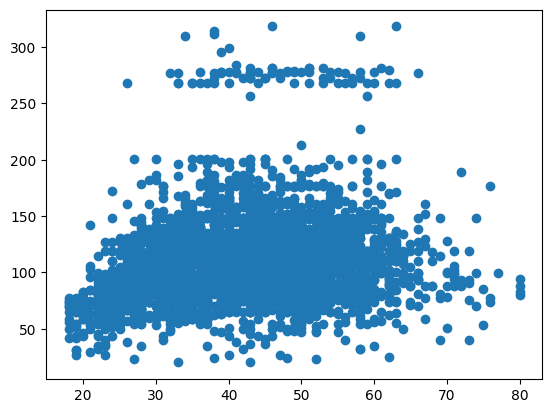

In [21]:
data_x = data['age']
data_y = data['wage']

plt.scatter(data_x, data_y)

In [29]:
import statsmodels.formula.api as smf

In [31]:
mod1 = smf.ols('wage ~ age', data=data).fit()
mod2 = smf.ols('wage ~ age + np.power(age,2)', data=data).fit()
mod3 = smf.ols('wage ~ age + np.power(age,2) + np.power(age,3)', data=data).fit()
mod4 = smf.ols('wage ~ age + np.power(age,2) + np.power(age,3) + np.power(age,4)', data=data).fit()
mod5 = smf.ols('wage ~ age + np.power(age,2) + np.power(age,3) + np.power(age,4) + np.power(age,5)', data=data).fit()

In [33]:
from statsmodels.stats.api import anova_lm

anova_lm(mod1, mod2, mod3, mod4, mod5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010101,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693660,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152118,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563016,0.804976,3.696820e-01


In [39]:
from statsmodels.stats.outliers_influence import summary_table

st, data1, ss2 = summary_table(mod3, alpha = 0.05)

print(st, data1, ss2)

       Obs    Dep Var  Predicted    Std Error    Mean ci    Mean ci Predict ci Predict ci   Residual  Std Error    Student     Cook's
           Population      Value Mean Predict    95% low    95% upp    95% low    95% upp              Residual   Residual          D
-------------------------------------------------------------------------------------------------------------------------------------
         1     75.043     58.689        4.013     50.821     66.557    -20.006    137.383     16.354     39.731      0.412      0.000
         2     70.476     84.274        1.824     80.699     87.850      5.893    162.656    -13.798     39.892     -0.346      0.000
         3    130.982    120.454        0.945    118.600    122.308     42.132    198.776     10.528     39.922      0.264      0.000
         4    154.685    119.778        0.957    117.901    121.655     41.456    198.101     34.907     39.922      0.874      0.000
         5     75.043    120.366        1.055    118.297    12

In [43]:
fittedvalues = data1[:,2]

predict_mean_se = data1[:,3]

predict_mean_ci_low, predict_mean_ci_up = data1[:,4:6].T

In [51]:
order = np.argsort(data_x.values.flatten())
print(order)

x = data_x.values.flatten()
x_o = data_x.values.flatten()[order]

print(x_o)

[   0  599 2327 ...  328 2022 1565]
[18 18 18 ... 80 80 80]


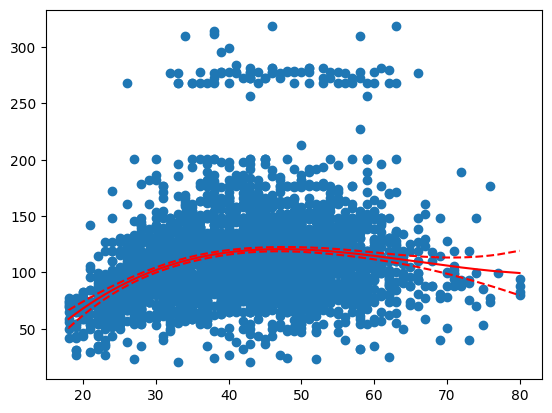

In [53]:
plt.scatter(data_x, data_y)
plt.plot(x_o, fittedvalues[order], 'r')
plt.plot(x_o, predict_mean_ci_low[order], 'r--')
plt.plot(x_o, predict_mean_ci_up[order], 'r--')

In [59]:
df_cut, bins = pd.cut(data_x, 4, retbins = True, right = True)
df_cut.value_counts(sort = False)

age
(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: count, dtype: int64

In [65]:
df_steps = pd.concat([data_x, df_cut, data_y], keys = ['age', 'age_cuts', 'wage'], axis = 1)

df_steps

df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies

,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,True,False,False
4,False,False,True,False
...,...,...,...,...
2995,False,True,False,False
2996,True,False,False,False
2997,True,False,False,False
2998,True,False,False,False


In [69]:
df_steps_dummies.columns = ['17.938-33.5','33.5-49.0','49.0-64.5','64.5, 80.0']

fit1 = sm.GLM(df_steps.wage, df_steps_dummies).fit()

In [73]:
xp = np.linspace(data_x.min(), data_x.max()-1)

bin_mapping = np.digitize(xp, bins)

X_pred = pd.get_dummies(bin_mapping)

pred = fit1.predict(X_pred)

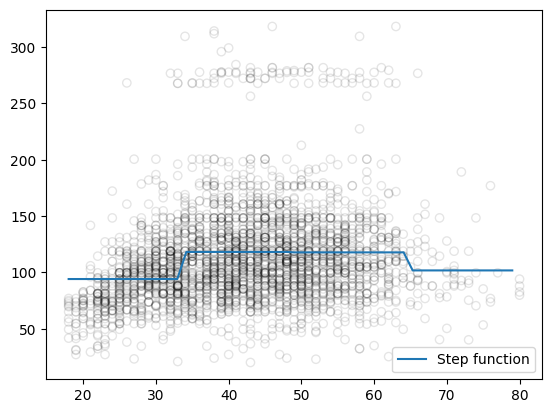

In [75]:
plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp,pred, label='Step function')
plt.legend()

In [83]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


In [85]:
from patsy import dmatrix

X1 = dmatrix('bs(train, knots=(25,40,60), degree=3)', {"train":data_x}, return_type='dataframe')
fit2 = sm.GLM(data_y, X1).fit()

X2 = dmatrix('bs(train, knots=(25,40,50,65), degree=3)', {"train":data_x}, return_type='dataframe')
fit3 = sm.GLM(data_y, X2).fit()

pred2 = fit2.predict(dmatrix('bs(valid, knots=(25,40,60), degree=3)', {"valid":data_x}, return_type='dataframe'))
pred3 = fit3.predict(dmatrix('bs(valid, knots=(25,40,50,65), degree=3)', {"valid":data_x}, return_type='dataframe'))

from sklearn.metrics import mean_squared_error
from math import sqrt

rms2 = sqrt(mean_squared_error(data_y, pred2))
rms3 = sqrt(mean_squared_error(data_y, pred3))

print(rms2,rms3)

39.87805195282879 39.83921566679096


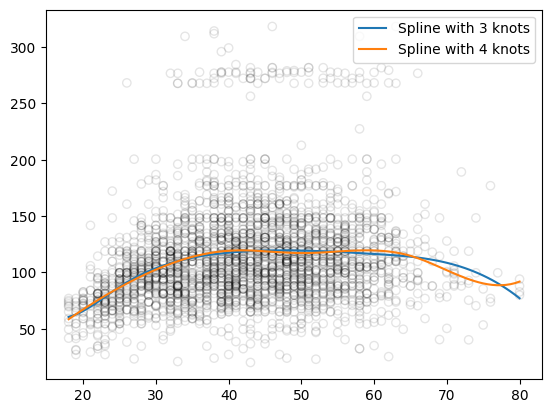

In [89]:
xp = np.linspace(data_x.min(),data_x.max(),100)

pred2 = fit2.predict(dmatrix('bs(xp, knots=(25,40,60), degree=3)', {"xp":xp}, return_type='dataframe'))
pred3 = fit3.predict(dmatrix('bs(xp, knots=(25,40,50,65), degree=3)', {"xp":xp}, return_type='dataframe'))

plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp,pred2,label='Spline with 3 knots')
plt.plot(xp,pred3,label='Spline with 4 knots')
plt.legend()

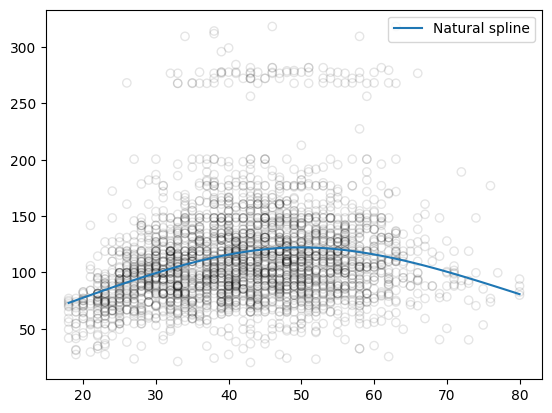

In [91]:
X3 = dmatrix('cr(train, df=3)', {"train":data_x}, return_type='dataframe')
fit4 = sm.GLM(data_y, X3).fit()

pred4 = fit4.predict(dmatrix('cr(xp, df=3)', {"xp":xp}, return_type='dataframe'))

plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp,pred4,label='Natural spline')
plt.legend()